<a href="https://colab.research.google.com/github/luisfranc123/Tutorials_Statistics_Numerical_Analysis/blob/main/Numerical_Methods/Chapter23_ODEs_(II).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**23. BOUNDARY-VALUE PROBLEMS FOR ORDINARY DIFFERENTIAL EQUATIONS (ODES)**
---
**Textbook**: Python Programming and Numerical Methods



####**23.1 ODE BOUNDARY VALUE PROBLEM STATEMENT**

The previous chapter introduced ordinary differential equation initial-value problems. For initial value problems, all the known values are specified at the same value of the independent variables, usually at the lower boundary of the interval; this is where the term "initial" comes from. This chapter introduces another type of probelm, namely the **boundary-value problem**. As the name suggests, the known values are specified at the extremes of the independent variable, i.e., the boundaries of the interval. For example, if we have a simple second-order differential equation,

$$\frac{d^2f(x)}{dx^2}=\frac{df(x)}{dx} + 3$$

and if the independent variable varies over the domain of $[0, 20]$, the initial value problem will have the two conditions at the value of zero: that is, we know the value of $f(0)$ and $f^{'}(0)$. In contrast, boundary-value problems will specify the values at $x = 0$ and $x = 20$. Note that to solve a first-order ODE to obtain a particular solution requires one constraint, while an $n$th-order ODE requires $n$ constraints.

The boundary-value problem for an $n$th-order ordinary differential equation,

$$F(x, f(x), \frac{df(x)}{dx}, \frac{d^2f(x)}{dx^2}, \frac{d^3f(x)}{dx^3}, ..., \frac{d^{n-1}f(x)}{dx^{n-1}}) = \frac{d^nf(x)}{dx^n},$$

specifies $n$ known boundary conditions at $a$ and $b$, to solve this equation on an interval of $x \space\epsilon\space[a, b]$. For the second-order case, since the boundary condition can be either be a value of $f(x)$ or a value of the derivative $f^{'}(x)$, we can have several different cases for the specified values. For exaple we can have the boundary condition values specified as:

1. Two values of $f(x)$, that is, $f(a)$ and $f(b)$ are known.
2. Two derivatives of $f^{'}(x)$, that is $f^{'}(a)$ and $f^{'}(b)$ are known.
3. Mixed conditions from the above two cases are known: that is, eithr $f(a)$ and $f^{'}(b)$ are known, or $f^{'}(a)$ and $f(b)$ are known.

To get the particular solutio, we need two boundary conditions. The second-order ODE boundary value problem is also called the "Two-Point Boudary-Value Problem." The higher-order ODE problems need additional boundary conditions, which are usually the values of higher derivatives of the independent variables.  

<img src="https://pythonnumericalmethods.studentorg.berkeley.edu/_images/23.01.01-Pin-Fin-Heat.png" width="400" height="300">

Fins are used in many applications to increase the heat tranfer from surfaces. Usually, the design of cooling pin fins is encountered in many applications, e.g., the pin fin used as a heat sink for cooling an object. We can model the temprature distribution in a pin fin as shown in the figure above, where the length of the fin is $L$, and the start and end of the fin are $x = 0$ and $x = L$, respectively. The tempratures at the two ends are $T_0$ and $T_L$, while $T_s$ is the temperature of the surrounding environment. If we consider both convection and radiation, the steady-state temperature distribution of the pin fin $T(x)$ can be modeled as follows:

$$\frac{d^2T}{dx^2} - \alpha_1(T - T_s) - \alpha_2(T^4 - T^4_s) = 0$$

with the boundary conditions, $T(0) = T_0$ and $T(L) = T_L$; $\alpha_1$ and $\alpha_2$ are coefficients. This is a second order ODE with two boundary conditions; therefore, we can solve it to get particular solutions.



####**23.2 THE SHOOTING METHOD**

<img src="https://pythonnumericalmethods.studentorg.berkeley.edu/_images/23.02.01-shooting.png" width="400" height="100">

The name "shooting method" is analogous with the target shooting: as shown in the figure above, we shoot at the target and observe wherewe hit the target. Based on the errors, we can adjust our aim and shot again hoping that we will hit closer to the target. We can see from the analogy that the shoting method is an iterative optimization method.

Let us see how the shooting method works using the second-order ODE given $f(a) = f_a$ and $f(b) = f_b$, as well as

$$F(x, f(x), \frac{df(x)}{dx}) = \frac{d^2f(x)}{dx^2}.$$

**Step 1.** We start the whole process by guessing $f^{'}(a) = \alpha$, then, together with $f(a) = f_a$, we turn the above problem into an initial value problem with two conditions all at the value $x = a$. This is the **aim** step.

**Step 2.** Using what we learned from previous chapter, i.e., we can use a Runge-Kutta method, to integrate to the other boundary $b$ to find $f(b) = f_\beta$. This is called the **shootong** step.

**Step 3.** Now we compare the value of $f_\beta$ with $f_b$. Usually, our initial guess is not good, and $f_\beta \neq f_b$, but what we want is $f_\beta - f_b = 0$; therefore, we adjust our initial guesses and repeat the process until the error is acceptable, at which time we can stop. This is the iterative step.

Although the ideas behind the shooting method are very simple, comparing and finding the best guesses is not easy; this procedure can be very teioud, but it does offer a systematic way to search for the best guess. Since $f_\beta$ is a function of $\alpha$, the problem becomes finding the root of $g(\alpha) - f_b = 0$. We can use any methods from Chapter 19 to slve the problem.

**TRY IT!** Say, we want to launch a rocket, and let $y(t)$ be the altitude (in meters from the surface) of the rocket at time $t$. We know the gravity $g = 9.8\space m/s^2$. If we want to have the rocket at 50 m off the ground after $5\space{s}$ after launch, what should be the velocity at launch?

To answer this question, we can frame the problem as a boundary-value problem for a second-order ODE. The ODE is

$$\frac{d^2y}{dt^2} = -g,$$

and the two boundary conditions are $y(0) = 0$ and $y(5) = 50$. We want to answer the question:

What's $y^{'}(0)$ at launch?

This is a quite simple quaestion and can be solved analytically quite easily; the correct answer $y^{'}(0) = 34.5$. If we slve it using the shoting method, we need to reduce the order of the function first, and the second-order ODE becomes:

$$\frac{dy}{dt} = v,$$

$$\frac{dv}{dt} = -g.$$

Therefore, we have $S(t) = \left[\begin{array}{cc}
y(t)\\
v(t)
\end{array}\right]$ which satisfies

$$\frac{dS(t)}{dt} = \left[\begin{array}{cc}
0 & 1\\
0 & -g/v
\end{array}\right]S(t)$$

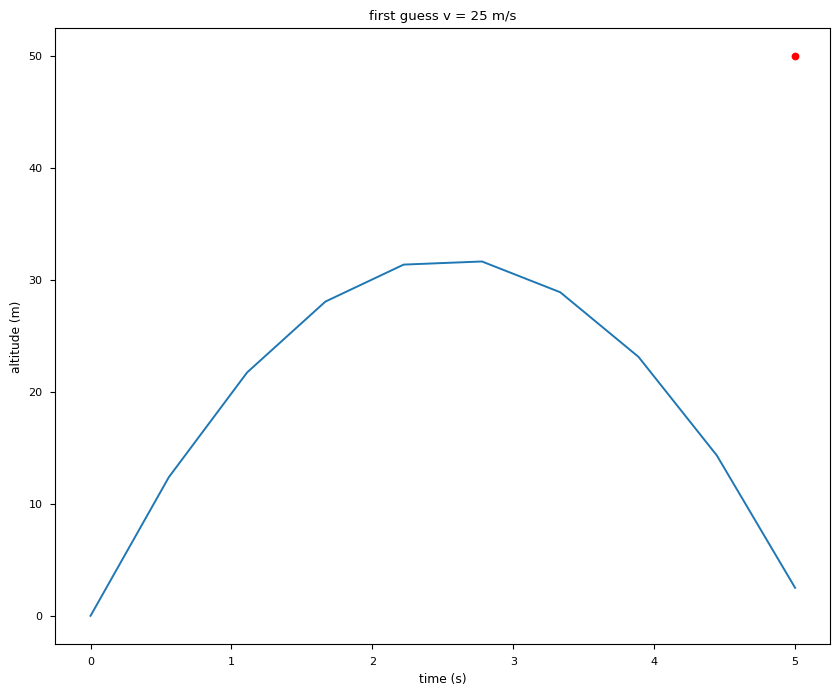

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.style.use('seaborn-v0_8-paper')

# For our first guess, we take the veocity at launch as 25 m/s
F = lambda t, s: np.dot(np.array([[0, 1], [0, -9.8/s[1]]]), s)

#t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 25
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, "ro")
plt.xlabel("time (s)")
plt.ylabel("altitude (m)")
plt.title(f"first guess v = {v0} m/s")
plt.show()


The figure shows that the first guess is a little too small, since after 5 s for the chosen initial velocity, the altitude of the rocket is less than 10 m. The red dot in the figure is the target we want to hit. If we adjust our guess and increase the velocity to 40 m/s, then we obtain:

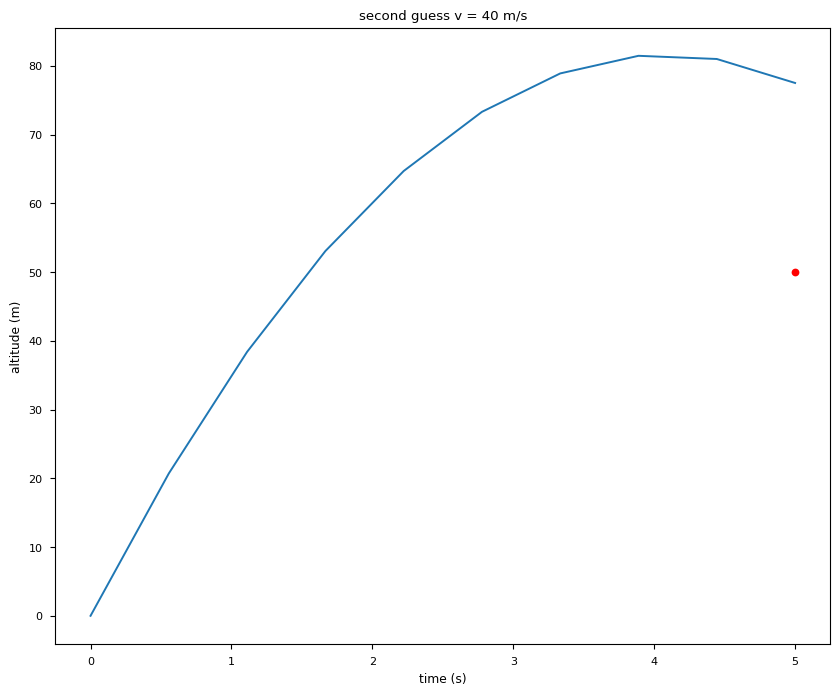

In [ ]:
v0 = 40
sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, "ro")
plt.xlabel("time (s)")
plt.ylabel("altitude (m)")
plt.title(f"second guess v = {v0} m/s")
plt.show()

Here, we overestimated the velocity. Therefore, this random guessing is perhaps not the best way to obtain the result. As we mentioned above, treating this procedure as a root-finding problem will provide us with a better result. Let us use Python's `fsolve` to find the root. The following example will demonstrate how to find the correct answer directly.  

In [ ]:
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp

# Define the differential equation function.
# The `s` argument represents the state vector [y, v].
def F(t, s):
    # s[0] is position (y), and s[1] is velocity (v).
    # dy/dt = v
    # dv/dt = -9.8 (constant acceleration due to gravity)
    return [s[1], -9.8]

# Define the initial position.
# This variable was missing in your original code.
y0 = 0

# Define the time points for evaluation.
# `t_eval` must be a list or array of time values.
t_eval = np.linspace(0, 5, 100)

# Define the objective function for fsolve.
# This function calculates the final position `y[-1]` and
# returns the difference from the target position `50`.
def objective(v0):
    # `solve_ivp` needs a list or array for the initial state.
    # It must be in the format [initial_y, initial_v].
    sol = solve_ivp(F, [0, 5], [y0, v0[0]], t_eval=t_eval)

    # Check if the solver was successful.
    if not sol.success:
        print("Warning: Solver failed for v0 =", v0[0])

    y = sol.y[0]
    return y[-1] - 50.

# Use fsolve to find the initial velocity `v0` that makes
# the objective function zero. The initial guess is 10.
v0_solution, = fsolve(objective, [10])

print(f"The required initial velocity is: {v0_solution:.3f} m/s")

The required initial velocity is: 34.500 m/s


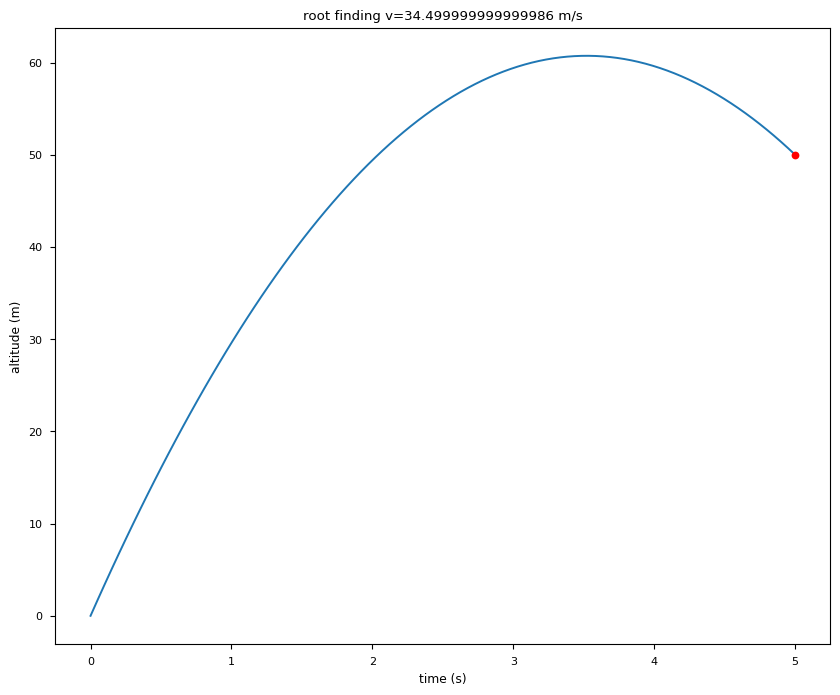

In [ ]:
sol = solve_ivp(F, [0, 5], [y0, v0_solution], t_eval = t_eval)
plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, "ro")
plt.xlabel("time (s)")
plt.ylabel("altitude (m)")
plt.title(f"root finding v={v0_solution} m/s")
plt.show()

**TRY IT!** Let us chage the initial guess and see if this changes the result.


In [ ]:
for v0_guess in range(1, 100, 10):
  v0, = fsolve(objective, v0_guess)
  print("Init: %d, Result: %.2f"% (v0_guess, v0))

Init: 1, Result: 34.50
Init: 11, Result: 34.50
Init: 21, Result: 34.50
Init: 31, Result: 34.50
Init: 41, Result: 34.50
Init: 51, Result: 34.50
Init: 61, Result: 34.50
Init: 71, Result: 34.50
Init: 81, Result: 34.50
Init: 91, Result: 34.50


Note that changing the initial guesses does not change the result, whch means that this method is stable; see below regarding the problem of stability.

####**23.3 THE FINITE DIFFERENCE METHOD**

Another way to solve the ODE boundary value problems is to use the **finte difference method**, where we use finite difference formulas at evenly spaced grid points to approximate the differential equations, which then transforms a differential equation into a system of algebraic equations to solve.

In the finite difference method, the derivatives in the differential equation are approximated using the finite difference formulas (Chapter 20 for more details). We can divide the interval of $[a, b]$ into $n$ equal subintervals of length $h$ as shown below.

<img src="https://pythonnumericalmethods.studentorg.berkeley.edu/_images/23.03.01-Finite-difference.png" width="400" height="300">

Usually, we use the central difference formulas in the finite difference methods because they yield better accuracy. The differential equation is enforced only at the grid points, and the first and second derivatives are:

$$\frac{dy}{dx} = \frac{y_{i+1} - y_{i-1}}{2h}$$

$$\frac{d^2y}{dx^2} = \frac{y_{i-1}-2y_i+y_{i+1}}{h^2}$$

These finite difference expressions are used to replace the derivatives of $y$ in the differential equation, leading to a system of $n + 1$ linear algebraic equations if the differential equation is linear. If the differential equation is nonlinear, the algebraic equations will also be nonlinear.



**EXAMPLE:** Slve the rocket problem in the previous section using the finite difference mthod; plot the altitude of the rocket after launch. The ODE is

$$\frac{d^2y}{dt^2} = -g$$

with the boundary conditions $y(0) = 0$ and $y(5) = 50$. Let us take $n = 10$.

Since the time interval is $[0, 5]$ and we have $n = 10$, $h = 0.5$, using the finite difference approximated derivatives, we obtain

$$y_0 = 0,\space y_{i-1} -2y_i + y_{i+1} = -gh^2, \space i = 1, 2, ... n-1, y_{10} = 50.$$

If we use matrix notation, we obtain

$$\left[\begin{array}{cc}
1 & 0 &  & & \\
1 & -2 & 1 & & \\
 & . & . & & \\
 & . & . & & \\
 & . & . & ... & \\
 & . & 1 & -2 & 1\\
 &  &  &  & 1\\
\end{array}\right]\left[\begin{array}{cc}
y_0\\
y_1\\
.\\
.\\
.\\
y_{n-1}\\
y_n
\end{array}\right] = \left[\begin{array}{cc}
0\\
-gh^2\\
.\\
.\\
.\\
-gh^2\\
50
\end{array}\right].$$

With 11 equations in the system, we can solve it using the method we presented in Chapter 14.

A:
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
b:
[ 0.   -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 -2.45 50.  ]


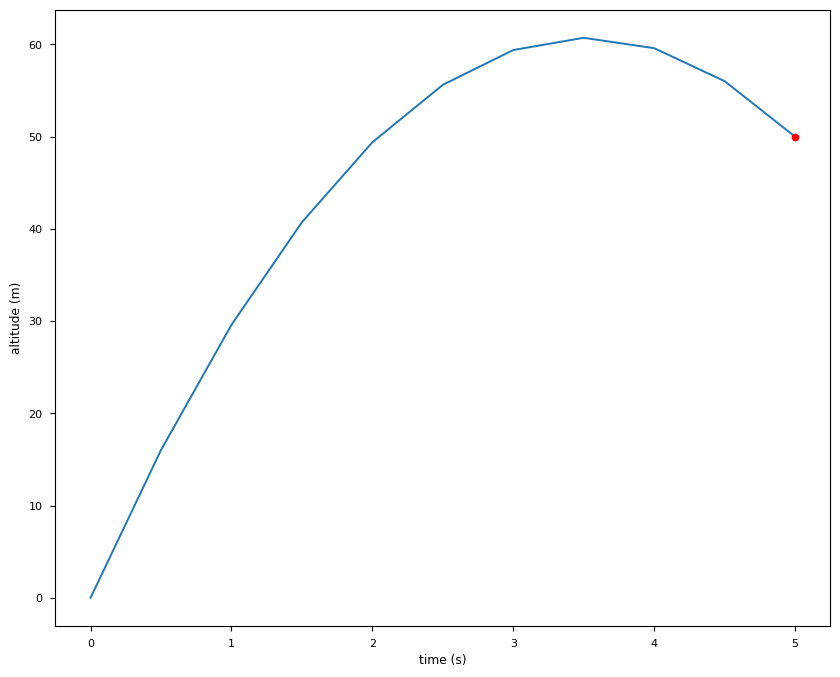

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-paper')

n = 10
h = (5 - 0)/n

# Get A
A = np.zeros((n + 1, n + 1))
A[0, 0] = 1
A[n, n] = 1

for i in range(1, n):
  A[i, i - 1] = 1
  A[i, i] = -2
  A[i, i + 1] = 1

print(f"A:\n{A}")

# Get b
b = np.zeros(n + 1)
b[1:-1] = -9.8*h**2
b[-1] = 50

print(f"b:\n{b}")

# Solve the linear equations
y = np.linalg.solve(A, b)
t = np.linspace(0, 5, 11)

plt.figure(figsize = (10, 8))
plt.plot(t, y)
plt.plot(5, 50, "ro")
plt.xlabel("time (s)")
plt.ylabel("altitude (m)")
plt.show()

Let us solve for $y^{'}(0)$. From the finite difference formula, we know that $\frac{dy}{dx} = \frac{y_{i+1} - y_{i-1}}{2h}$, which means that $y^{'}(0) = \frac{y_1-y_{-1}}{2h}$; but we do know what is $y_{-1}$. We can calculate $y_{-1}$ since we know the values on each grid poitn. From the second derivative finite difference formula, we know that $\frac{y_{-1} - 2y_0 + y_1}{h^2} = -g$; therefore, we can solve for $y_{-1}$ to obtain the launching velocity. See the calculation below.


In [ ]:
y_n1 = -9.8*h**2 + 2*y[0] - y[1]
(y[1] - y_n1)/(2*h)

np.float64(34.5)

We obtain the correct launching velocity using the finite difference method. To give you additional exposure to this concept, let us see another example.

**TRY IT!** Use the finite difference method to solve the following linear boundary value problem:

$$\frac{d^{''}y(t)}{dt^2} = -4y + 4x$$

with the boundary conditions as $y(0) = 0$ and $y^{'}(\pi/2) = 0$. The exact solution of the problem is $y = x - sin(2x)$, plot the errors against the $n$ grid points ($n$ from 3 to 100)for the boundary point $y(\pi/2)$.

Using the finite difference approximated derivatives, we have

$$y_0 = 0, \space y_{i-1} - 2y_i + y_{i+1} - h^2(-4y_i + 4x_i) = 0 \space i = 1, 2, ..., n-1, \space 2y_{n-1} - 2y_n - h^2(-4y_n + 4x_n) = 0.$$

The last equation is derived from $\frac{y_{n+1} - y_{n-1}}{2h} = 0$ (the boundary condition $y^{'}(\pi/2) = 0$); therefore, $y_{n+1} = y_{n-1}$.

If we use matrix notation, we will obtain:

$$\left[\begin{array}{cc}
1 & 0 &  & & \\
1 & -2 + 4h^2 & 1 & & \\
 & . & . & & \\
 & . & . & & \\
 & . & . & ... & \\
 & . & 1 & -2 + 4h^2 & 1\\
 &  &  & 2 & -2 + 4h^2\\
\end{array}\right]\left[\begin{array}{cc}
y_0\\
y_1\\
.\\
.\\
.\\
y_{n-1}\\
y_n
\end{array}\right] = \left[\begin{array}{cc}
0\\
4h^2x_1\\
.\\
.\\
.\\
4h^2x_{n-1}\\
4h^2x_n
\end{array}\right].$$

<>:38: SyntaxWarning: invalid escape sequence '\p'
<>:38: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3538318223.py:38: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel(f"errors at x = $\pi/2$")


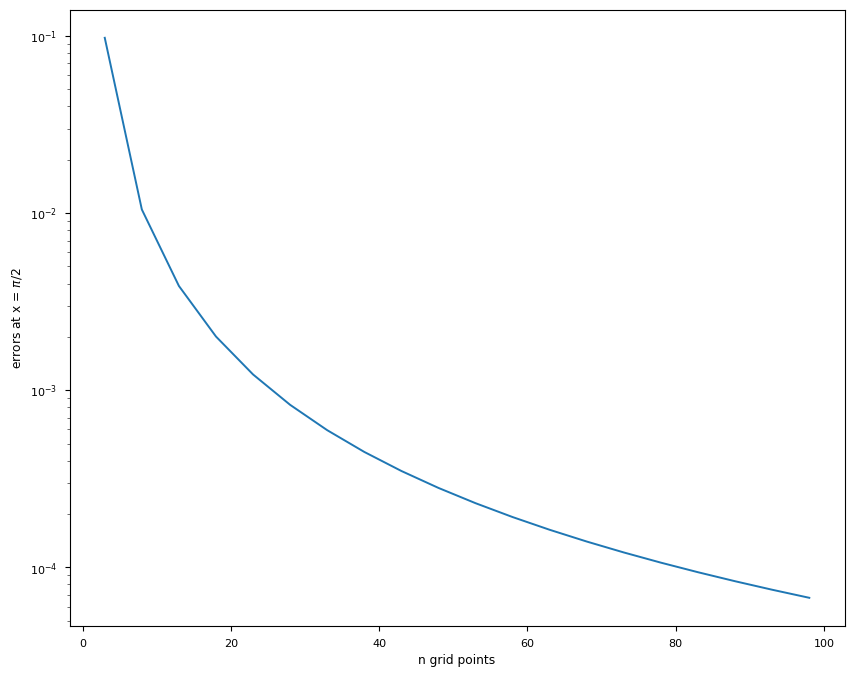

In [ ]:
def get_a_b(n):
  h = (np.pi/2)/n
  x = np.linspace(0, np.pi/2, n + 1)
  # Get A
  A = np.zeros((n + 1, n + 1))
  A[0, 0] = 1
  A[n, n] = -2 + 4*h**2
  A[n, n - 1] = 2
  for i in range(1, n):
    A[i, i - 1] = 1
    A[i, i] = -2 + 4*h**2
    A[i, i + 1] = 1

  # Get b
  b = np.zeros(n + 1)
  for i in range(1, n+1):
    b[i] = 4*h**2*x[i]

  return x, A, b

x = np.pi/2
v = x - np.sin(2*x)

n_s = []
errors = []

for n in range(3, 100, 5):
  x, A, b = get_a_b(n)
  y = np.linalg.solve(A, b)
  n_s.append(n)
  e = v - y[-1]
  errors.append(e)

plt.figure(figsize = (10, 8))
plt.plot(n_s, errors)
plt.yscale("log")
plt.xlabel("n grid points")
plt.ylabel(f"errors at x = $\pi/2$")
plt.show()

With denser grid points, we approach the exact solution at the boundary point.

The finite difference method can be also applied to higher-order ODEs, but it needs approximation of the higher-order derivatives using a finite difference formula. For example, to solve a fourth-order ODE requires performing the following:

$$\frac{d^4y}{dx^4} = \frac{y_{i-2} - 4y_{i-1} + 6y_i - 4y_{i+1} + y_{i+2}}{h^4}.$$

####**23.4 NUMERICAL ERROR AND INSTABILITY**
(**Textbook**)

####**23.5 SUMMARY AND PROBLEMS**

#####**23.5.1 SUMMARY**

1. Boundary-value problems are a speciﬁc kind of ODE-solving problem with boundary conditions
speciﬁed at the start and end of the interval.
2. The shooting method can transform boundary-value problems to initial value problems, and we can
use a root-ﬁnding method to solve them.
3. The ﬁnite difference method uses a ﬁnite difference scheme to approximate the derivatives and turns
the problem into a set of equations to solve.
4. The accuracy and stability of the boundary-value problems have similarities and differences when
compared to the initial-value problems.